In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
TIME = int(input())

 2025


In [4]:
df = pd.read_csv('bitcoin_2017_to_2023.csv')
df.isnull().values.any()
df.head(10)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611
5,2023-08-01 13:14:00,28890.40,28896.00,28890.39,28895.99,9.88869,2.857173e+05,389,5.46417,157873.630690
6,2023-08-01 13:13:00,28889.63,28890.40,28889.63,28890.39,17.87871,5.165159e+05,266,16.19349,467829.891694
7,2023-08-01 13:12:00,28881.54,28889.64,28881.53,28889.64,13.48153,3.894235e+05,500,11.58691,334697.039929
8,2023-08-01 13:11:00,28876.00,28881.54,28875.99,28881.54,6.85924,1.980829e+05,274,5.93315,171339.627576
9,2023-08-01 13:10:00,28872.48,28876.00,28870.00,28876.00,10.75734,3.105872e+05,381,7.87944,227495.165785


In [5]:
df['Date'] = pd.to_datetime(df['timestamp']).dt.date
group = df.groupby('Date')
Daily_Price = group['close'].mean()
Daily_Price.head()

Date
2017-08-17    4358.630667
2017-08-18    4230.951715
2017-08-19    4070.712250
2017-08-20    4123.014063
2017-08-21    4035.014465
Name: close, dtype: float64

In [6]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [7]:
new_df.head()

,Close
Date,
2017-08-17,4358.630667
2017-08-18,4230.951715
2017-08-19,4070.712250
2017-08-20,4123.014063
2017-08-21,4035.014465


Text(0, 0.5, '$(Dollar)')

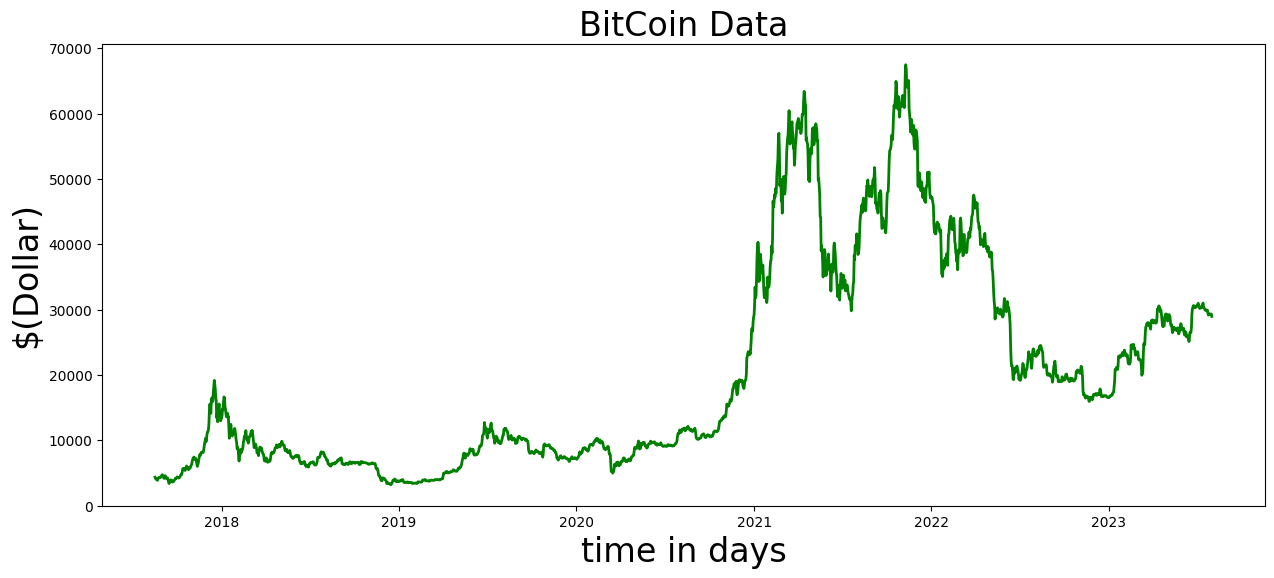

In [8]:
plt.plot(new_df,color='green', lw=2)
plt.title("BitCoin Data",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df=new_df
forecast_out = int(TIME)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop('Prediction', axis=1))

X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
print(X_forecast.shape)
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#self-built linear regression
class CustomLinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        # calculating weights using the normal equation: w = (X^T * X)^-1 * X^T * y
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        # Add a column of ones to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        # Calculate predictions
        return X @ self.weights

# creating an instance
custom_lr = CustomLinearRegression()

custom_lr.fit(X_train, y_train)

# making predictions on test set
cross_validation = custom_lr.predict(X_test)

# uses R-squared as the confidence metric
residuals = y_test - cross_validation
ss_res = np.sum(residuals ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
confidence = 1 - (ss_res / ss_tot)
print("Confidence (R-squared): ", confidence)

# predictions for the forecast
forecast_predictions = custom_lr.predict(X_forecast)
print("Forecast Predictions: ", forecast_predictions)


(2025, 1)
Confidence (R-squared):  0.1412264730149092
Forecast Predictions:  [29370.75497662 28871.5251198  28455.80485195 ... 33633.32958483
 33641.59592755 33541.78932314]


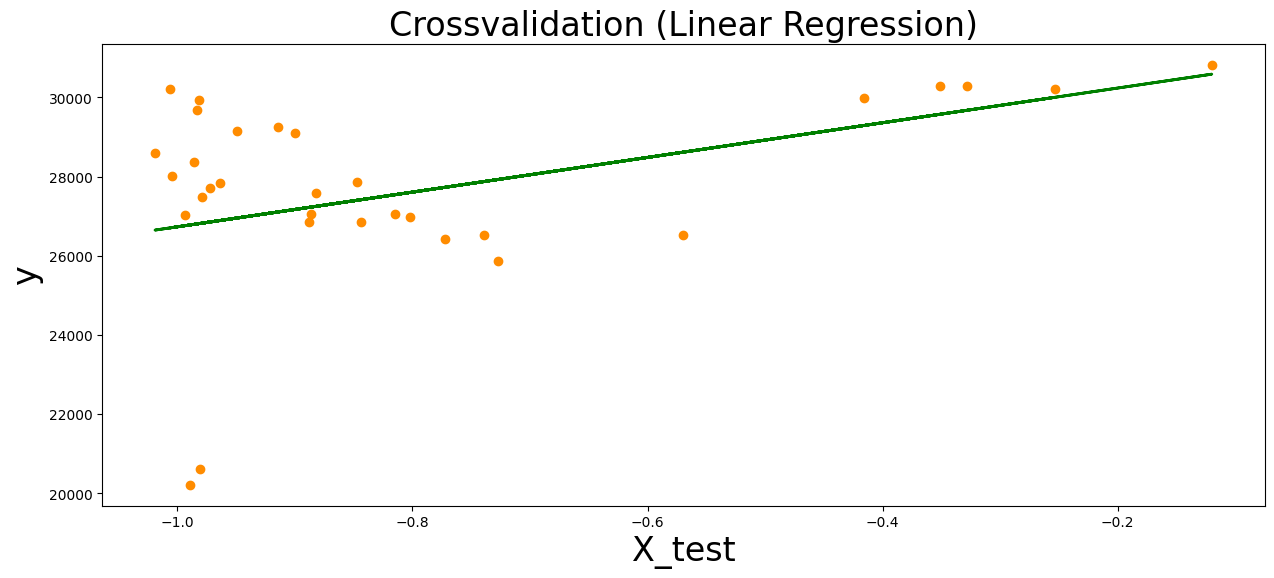

In [10]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, cross_validation, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

16151.186131136941


In [14]:
last_date = new_df.iloc[-1].name
print(last_date)

2023-08-01


In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(TIME-1), freq='D')
print(len(days),len(forecast_predictions))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_predictions})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

720 720
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2023-08-01 to 2025-07-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   720 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB
                  Close    Prediction
Date                                 
2017-08-17  4358.630667  11726.780028
2017-08-18  4230.951715  11819.388986
2017-08-19  4070.712250  11842.741451
2017-08-20  4123.014063  11604.230743
2017-08-21  4035.014465  11399.188361


Text(0, 0.5, '$(Dollar)')

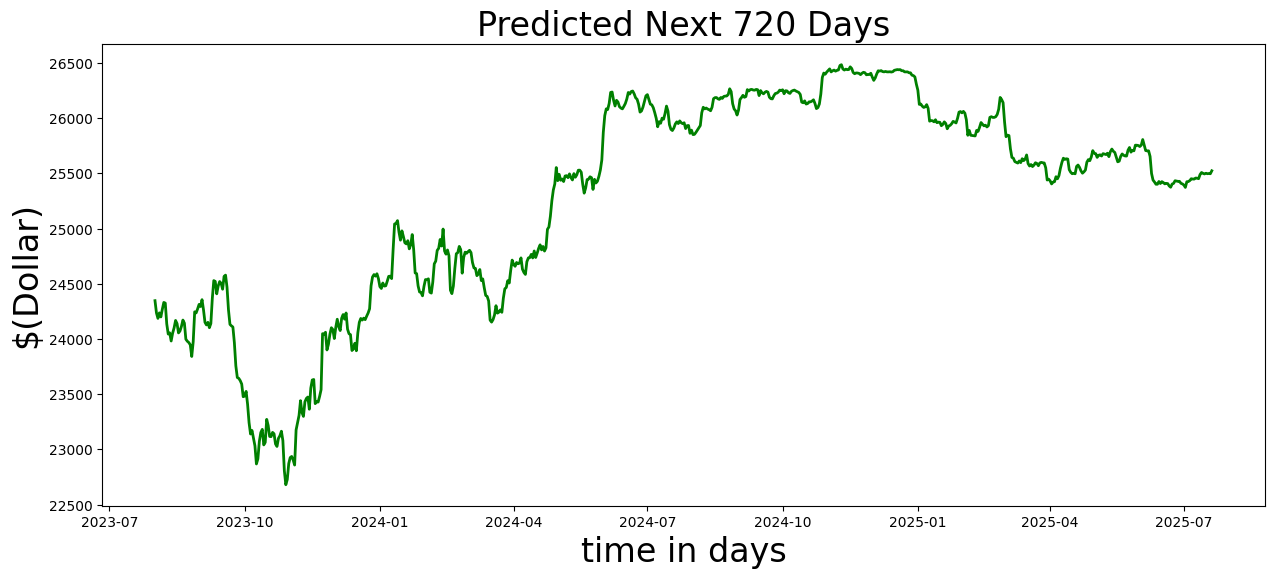

In [16]:
plt.plot(df1,color='green', lw=2)
plt.title(f"Predicted Next {TIME} Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

Text(0, 0.5, '$(Dollar)')

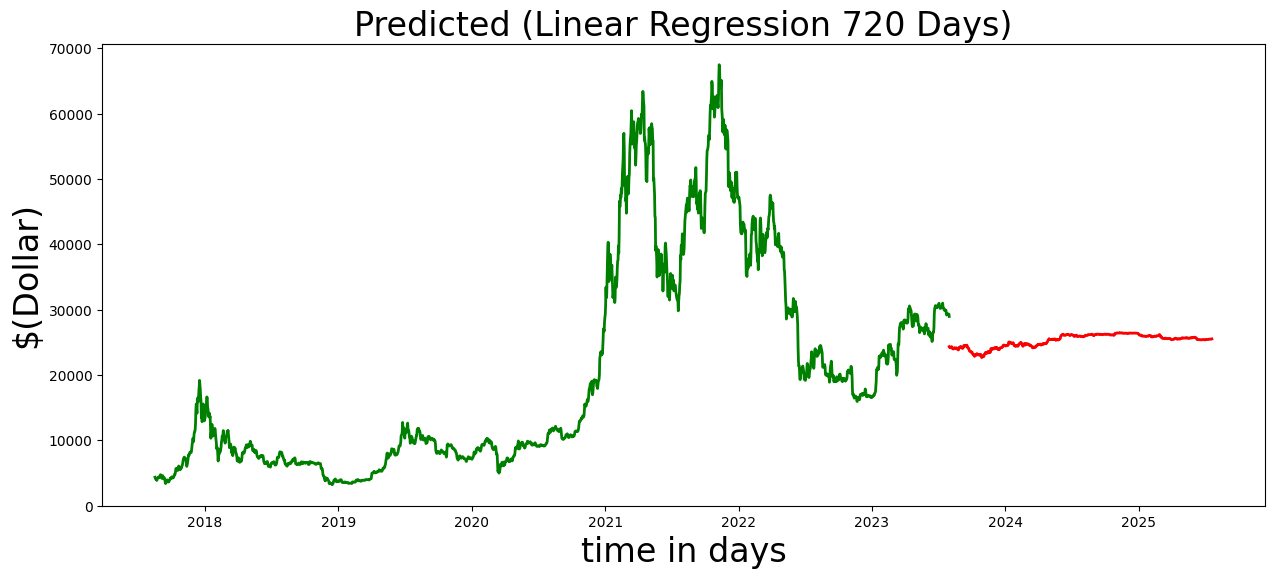

In [17]:
plt.plot(df1,)
plt.plot(df['Close'],color='green', lw=2, label='Bitcoin Data')
plt.plot(df1['Close'],color='red', lw=2, label='Predicted')
plt.title(f"Predicted (Linear Regression {TIME} Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)